## Question 1: Extracting Tesla Stock Data Using yfinance (2 Points)
You need to extract Tesla stock data using yfinance.

In [8]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Show first few rows of data
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping (1 Point)
You need to scrape Tesla revenue data from a financial website using BeautifulSoup.

In [21]:
# Step 2: Get Tesla's yearly financials (including revenue)
tesla_financials = tesla.financials

# Step 3: Extract Tesla's revenue from the financials
tesla_revenue = tesla_financials.loc['Total Revenue']

# Step 4: Display the last five rows using the tail function
print("Last five rows of Tesla's yearly revenue:")
print(tesla_revenue.tail())

Last five rows of Tesla's yearly revenue:
2023-12-31    96773000000.0
2022-12-31    81462000000.0
2021-12-31    53823000000.0
2020-12-31    31536000000.0
2019-12-31              NaN
Name: Total Revenue, dtype: object


## Question 3: Extracting GameStop Stock Data Using yfinance (2 Points)

In [10]:
# Download GameStop stock data using yfinance
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Show the first few rows of data
gamestop_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Yearly Revenue Using yfinance (1 Point)

In [22]:
# Step 2: Get Tesla's yearly financials (including revenue)
gamestop_financials = gamestop.financials

# Step 3: Extract Tesla's revenue from the financials
gamestop_revenue = gamestop_financials.loc['Total Revenue']

# Step 4: Display the last five rows using the tail function
print("Last five rows of GameStop's yearly revenue:")
print(gamestop_revenue.tail())

Last five rows of GameStop's yearly revenue:
2024-01-31    5272800000.0
2023-01-31    5927200000.0
2022-01-31    6010700000.0
2021-01-31    5089800000.0
2020-01-31             NaN
Name: Total Revenue, dtype: object


## Question 5: Tesla Stock and Revenue Dashboard (2 Points)

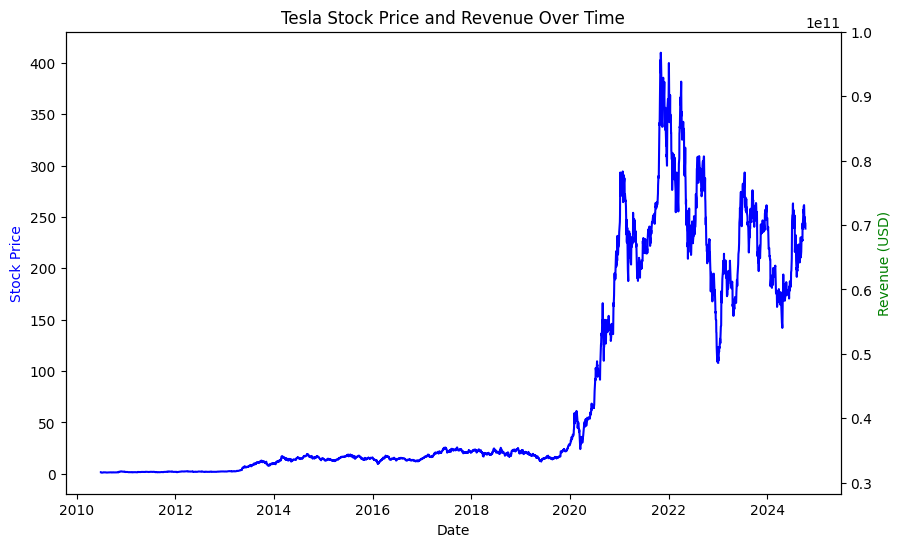

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both tesla_data and tesla_revenue have the same datetime format
tesla_data.index = pd.to_datetime(tesla_data.index).tz_localize(None)
tesla_revenue.index = pd.to_datetime(tesla_revenue.index)

# Concatenate the stock and revenue data
tesla_merged = pd.concat([tesla_data, tesla_revenue.to_frame()], axis=1)

# Plot Tesla Stock Price and Revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(tesla_merged.index, tesla_merged['Close'], color='b', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

ax2 = ax1.twinx()
ax2.plot(tesla_merged.index, tesla_merged['Total Revenue'], color='g', label='Revenue')
ax2.set_ylabel('Revenue (USD)', color='g')

plt.title('Tesla Stock Price and Revenue Over Time')
plt.show()


## Question 6: GameStop Stock and Revenue Dashboard (2 Points)

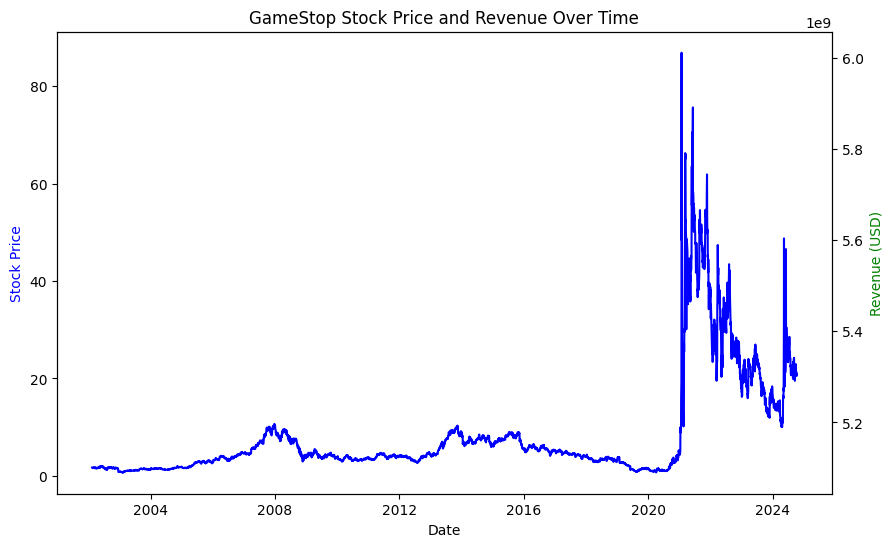

In [17]:
# Ensure both DataFrames have the same datetime format
gamestop_data.index = pd.to_datetime(gamestop_data.index).tz_localize(None)
gamestop_revenue.index = pd.to_datetime(gamestop_revenue.index)

# Concatenate stock and revenue data
gamestop_merged = pd.concat([gamestop_data, gamestop_revenue.to_frame()], axis=1)

# Plot GameStop Stock Price and Revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(gamestop_merged.index, gamestop_merged['Close'], color='b', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

ax2 = ax1.twinx()
ax2.plot(gamestop_merged.index, gamestop_merged['Total Revenue'], color='g', label='Revenue')
ax2.set_ylabel('Revenue (USD)', color='g')

plt.title('GameStop Stock Price and Revenue Over Time')
plt.show()
